In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/UpdatedResumeDataSet.csv')

In [ ]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [ ]:
df.shape

(962, 2)

In [ ]:
df['Category'].value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

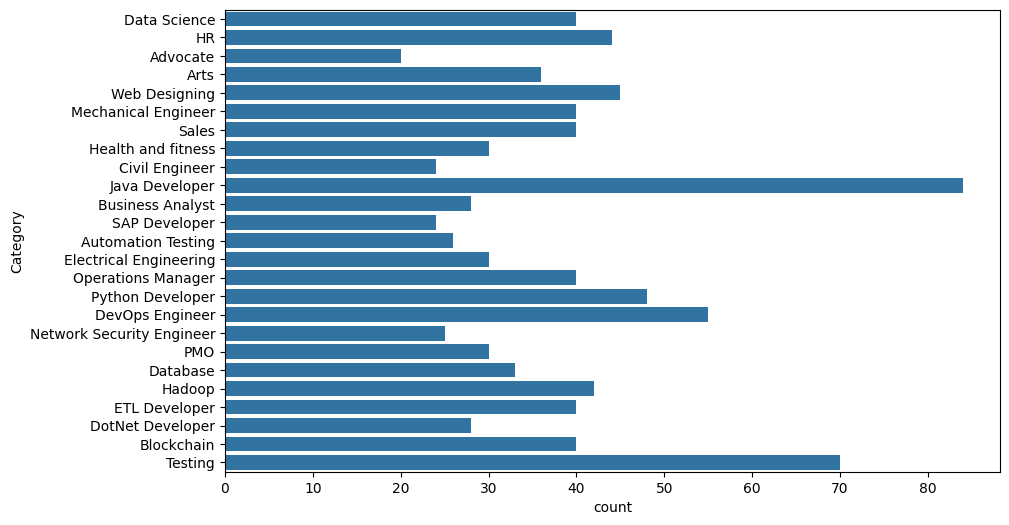

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(df['Category'])
plt.show()

## Cleaning Data:

1. URLs
2. mantions
3. hashtags
4. special letters
5. punctuations

In [ ]:
import re
def cleanResume(txt):
  cleanText = re.sub('http\S+\s', ' ', txt)  # remove URLs
  cleanText = re.sub('RT|cc', ' ', cleanText)  # remove RT and cc
  cleanText = re.sub('#\S+\s', ' ', cleanText)  # remove hashtags
  cleanText = re.sub('@\S+', ' ', cleanText)  # remove mentions
  cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)  # remove punctuations
  cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText)
  cleanText = re.sub('\s+', ' ', cleanText)  # remove extra whitespace
  return cleanText


In [ ]:
df['Resume'][4]

'Education Details \r\n MCA   YMCAUST,  Faridabad,  Haryana\r\nData Science internship \r\n\r\n\r\nSkill Details \r\nData Structure- Exprience - Less than 1 year months\r\nC- Exprience - Less than 1 year months\r\nData Analysis- Exprience - Less than 1 year months\r\nPython- Exprience - Less than 1 year months\r\nCore Java- Exprience - Less than 1 year months\r\nDatabase Management- Exprience - Less than 1 year monthsCompany Details \r\ncompany - Itechpower\r\ndescription - '

In [ ]:
cleanedResume = df['Resume'].apply(lambda x: cleanResume(x))

In [ ]:
cleanedResume[4]

'Education Details MCA YMCAUST Faridabad Haryana Data Science internship Skill Details Data Structure Exprience Less than 1 year months C Exprience Less than 1 year months Data Analysis Exprience Less than 1 year months Python Exprience Less than 1 year months Core Java Exprience Less than 1 year months Database Management Exprience Less than 1 year monthsCompany Details company Itechpower description '

## Handling categorical values

In [ ]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])

In [ ]:
df['Category'].unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

## Vectorization

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

tfidf.fit(cleanedResume)
requiredText = tfidf.transform(cleanedResume)

In [ ]:
requiredText

<962x7351 sparse matrix of type '<class 'numpy.float64'>'
	with 164261 stored elements in Compressed Sparse Row format>

## Train test split

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(requiredText, df['Category'], test_size=0.2, random_state=42)

In [ ]:
x_train.shape

(769, 7351)

In [ ]:
x_test.shape

(193, 7351)

## Training

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [ ]:
y_pred

array([15, 15, 15, 13, 14, 17, 16,  2,  0, 14, 13, 12, 16, 23, 20,  5,  6,
        4, 10,  9, 19,  1, 10, 23, 23, 21, 22, 22,  2, 12, 18,  1,  8, 24,
       11, 23,  7, 12, 24,  8, 18,  6,  8, 19, 24, 23, 21,  1, 15,  4, 15,
       22, 11,  5, 15, 13,  1, 19,  5, 12, 22, 22, 20, 24, 21, 18, 12, 10,
       10, 20, 10,  8,  9, 21, 17, 21,  0, 17, 16, 14, 15, 11, 11,  8, 20,
        3, 19,  8,  0,  2,  9, 10,  2, 23, 20, 20, 23, 12, 18, 12,  7, 16,
        8, 14, 18,  3, 14, 19, 14, 14, 15, 18,  8,  2, 21, 18, 23, 10, 23,
        5, 11, 15, 12,  3,  5,  3,  7, 12, 19,  8, 20, 19,  3, 15,  9, 19,
        1, 23, 21,  5, 20, 15, 16,  7,  7,  8, 15, 18,  1, 15, 13, 20,  7,
        4, 18, 11,  5, 15,  5, 12,  9, 22, 18, 21,  8, 23,  4, 12, 24, 16,
       15, 22,  8, 22,  3, 16, 23, 23, 12,  7, 16, 18,  5,  3, 18,  8, 23,
       23, 20, 21,  6,  7, 23])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9844559585492227

In [ ]:
# from sklearn.multiclass import OneVsRestClassifier

# clf = OneVsRestClassifier(KNeighborsClassifier())
# clf.fit(x_train, y_train)
# y_pred = clf.predict(x_test)

In [ ]:
# accuracy_score(y_test, y_pred)

## Pickle dump

In [ ]:
import pickle
pickle.dump(tfidf, open('tfidf.pkl', 'wb'))
pickle.dump(clf, open('clf.pkl', 'wb'))

## Predicting

In [ ]:
# Map category ID to category name
category_mapping = {
    6: "Data Science",
    12: "HR",
    0: "Advocate",
    1: "Arts",
    24: "Web Designing",
    16: "Mechanical Engineer",
    22: "Sales",
    14: "Health and fitness",
    5: "Civil Engineer",
    15: "Java Developer",
    4: "Business Analyst",
    21: "SAP Developer",
    2: "Automation Testing",
    11: "Electrical Engineering",
    18: "Operations Manager",
    20: "Python Developer",
    8: "DevOps Engineer",
    17: "Network Security Engineer",
    19: "PMO",
    7: "Database",
    13: "Hadoop",
    10: "ETL Developer",
    9: "DotNet Developer",
    3: "Blockchain",
    23: "Testing"
}

In [ ]:
myresume = "Civil Engineer Resume Sample Nathan Harry CIVIL ENGINEER  Summary Dedicated and motivated civil engineer skilled in all phases of engineering operations, Consistently finishes projects under budget and ahead of schedule, Experience in finishing constructions, Demonstrated strengths in maintaining the highest quality and standard of the work and productivity, Raising staff Motivation, Good organizational skills gained once i have started working in site treating with different providers, workers, Dealing under pressure using all types to solve all problems and planning ahead.  Skills Adept with engineering tools and techniques Certificate in AutoCAD Extensive experience in residential, commercial and industrial projects Forward-thinking professionals familiar with all aspects of construction and commercial Raising staff motivation and increasing quality through evaluation of workmanship Experience in MS Word, Excel, and PPT Certificated in SketchUp Experience Supervisor – Civil Engineer Gensler – San Francisco, California    (Aug 2014 – Present)  Review all types of building projects in Lebanon (commercial, residential, hospitals, public properties, educational projects, touristic projects..) in order to give the final approval on the project’s permit Review and approve the structural drawings in order to proceed with the construction work Review and approve all the projects upon the completion of the construction, with site visits when needed Ensure that the consultant/engineer is abiding by the structural codes (geotechnical reports, concrete strength, steel codes..) Ensure that the consultant/engineer is abiding by the Lebanese construction laws Train and educate employees on current and new rules, regulations and practices Acting Construction Manager Jacobs – Pasadena, California    (Nov 2011 – Jun 2014)  Worked in Sama Beirut Project (Sodeco Area) The client is Antonius Group The consultant is Erga Group The project consists of: a tower, a podium, and a retail area A luxurious residential and business tower- 52 levels. Retail Area: several stores and parking area. Main Responsibilities: Site execution Coordination of structural, architectural, and MEP shop drawings Managing and coordinating with the staff related to: MEP, procurement, shop drawings, quantity surveying, cost control, and concrete batching plant Worked on some variation orders (VO) especially on block and plaster works after changing the design of some apartments The variation orders include the description of varied work, details of variation, the BOQ, attachments of the new and old shop drawings, the new and old quantities, the approved field inspection requests, estimated time and cost effect, notice for possible variation (NPV) andnotice for the possible delay (NPD) Familiar with Primavera P6 Project Engineer AECOM Technology Corp. – Los Angeles    (Oct 2010 – Oct 2011)  Worked in Solidere area in the New Waterfront Project (NWF) The client is Solidere The consultant is Dar Al- Handasa Handled the temporary works in the NWF Project; such as substations and temporary roads, including all infrastructure networks Managed the procurement of materials and supplies, shop drawings, quantity surveying, and site execution Managed the monthly payment statements which include the advanced payment, on site material, the minimum and maximum monthly interim payments and the percentage of retention and recovery, time of payment and correction of certificates if found Managed VO due to design changes Languages English Arabic French Spanish Education Bachelor of Civil Engineering University of Central Missouri – Warrensburg, US   (Sep 2002 – Aug 2007)  Personal Skills Excellent Communication Teamwork Time Management Critical Thinker and problem solver Courses Certification in SketchUp Sight Rock Designs Jan 2010 Certification on AutoCAD Next Designs Feb 2012"

In [ ]:
import pickle

# Load the trained classifier
clf = pickle.load(open('clf.pkl', 'rb'))

# Clean the input resume
cleaned_resume = cleanResume(myresume)

# Transform the cleaned resume using the trained TfidfVectorizer
input_features = tfidf.transform([cleaned_resume])

# Make the prediction using the loaded classifier
pred_id = clf.predict(input_features)[0]

category_name = category_mapping.get(pred_id, "Unknown")
print("Predicted Category:", category_name)

Predicted Category: Civil Engineer
